In [ ]:
library(dplyr)
require(ggplot2)
require(reshape2)
require(tidyverse)
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(DescTools)

### Esercise 1
a) Given $p=\frac{29}{150}$ we have that the Likelihood of the process is
$f(y|p,n,M)={n\choose y}p^(1-p)^{n-y}$, with $y\leq n$ i.e. the Binomial distribution

b) Considering a prior $P(p|M)=U(0,1)=B(1,1)$ the Posterior $P(p|y,M)$ will have the same form of the Likelihood, a part from a normalization factor Z.
Exploting the conjugate priors propriety we get 

$P(p|r,n,M)=\frac{1}{Z}p^{r+\alpha-1}(1-p)^{n-r+\beta-1}$=
$\frac{1}{B(r+1, n-r+1)}p^{r}(1-p)^{n-r}$ with $p \in [0, 1]$

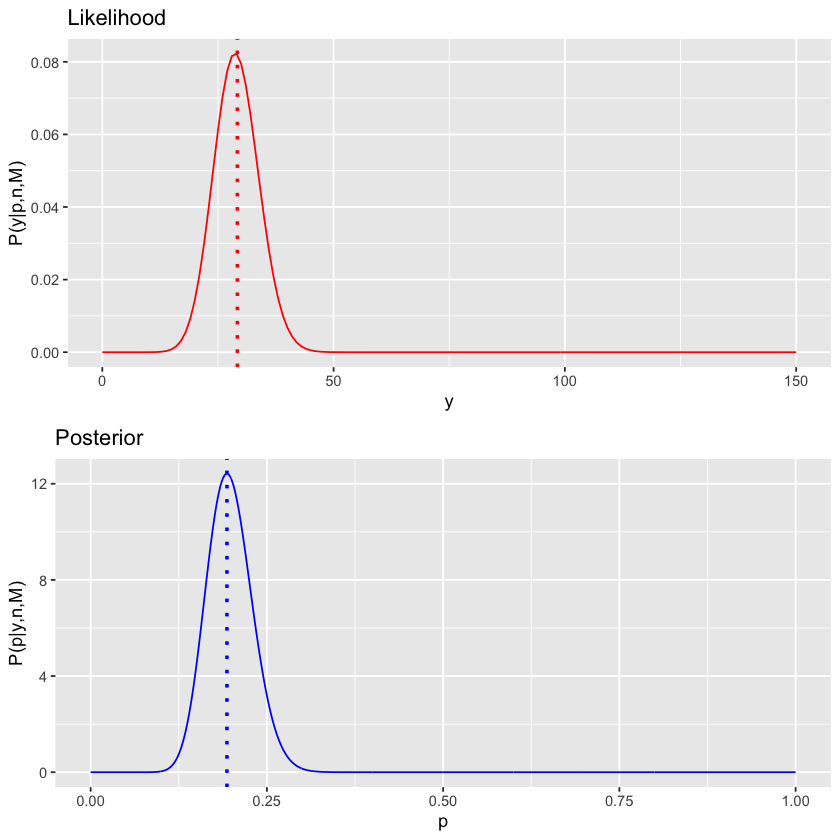

In [2]:
prob <- 29/150
Ntrials = 150 
r <- 29
x <- seq(0, Ntrials, len=Ntrials+1)
p <- seq(0, 1, len=1000)

likelihood <- dbinom(x, p=prob, size=Ntrials)
normalization = integrate(dbinom, lower=0, upper=1, x=r, size=Ntrials)$value
posterior <- dbinom(r, p=p, size=Ntrials)/normalization
modeL = (Ntrials+1)*prob
modeP = r/Ntrials


plot1 <-ggplot()+geom_line(aes(x = x, y = likelihood), col='red')+labs(title='Likelihood', y='P(y|p,n,M)', x='y') +
geom_vline(xintercept = modeL, linetype="dotted", 
                color = "red", size=1)
plot2 <- ggplot()+geom_line(aes(x = p, y = posterior), col='blue')+labs(title='Posterior', y='P(p|y,n,M)', x='p') +
geom_vline(xintercept = modeP, linetype="dotted", 
                color = "blue", size=1)
plots <- list(plot1, plot2)
args <- c(plots, ncol=1 ) 

do.call(grid.arrange, args)

### Exercise 2

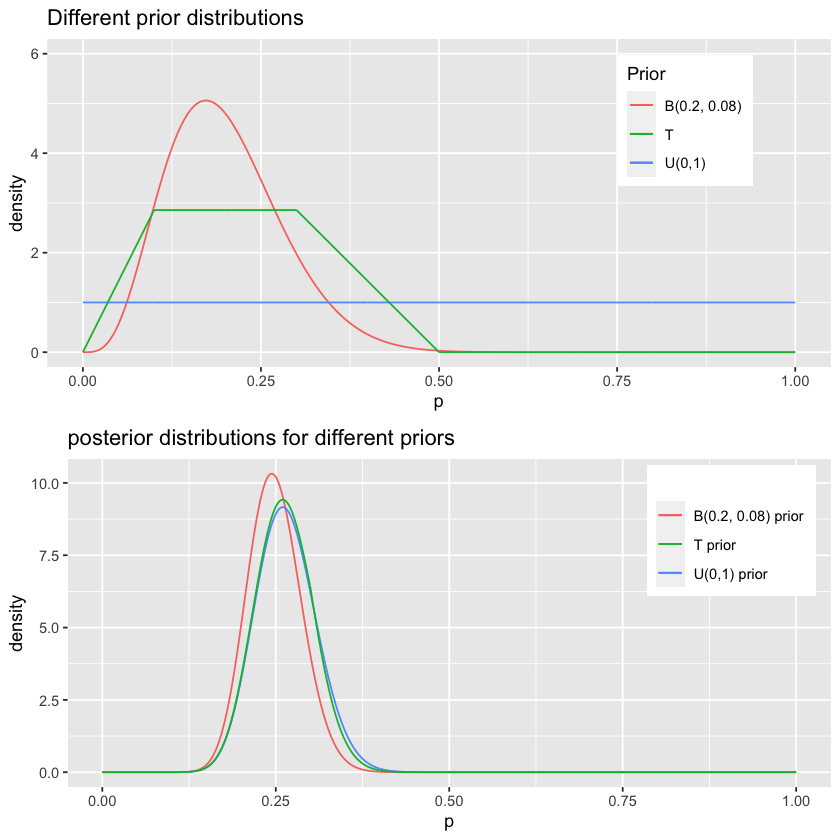

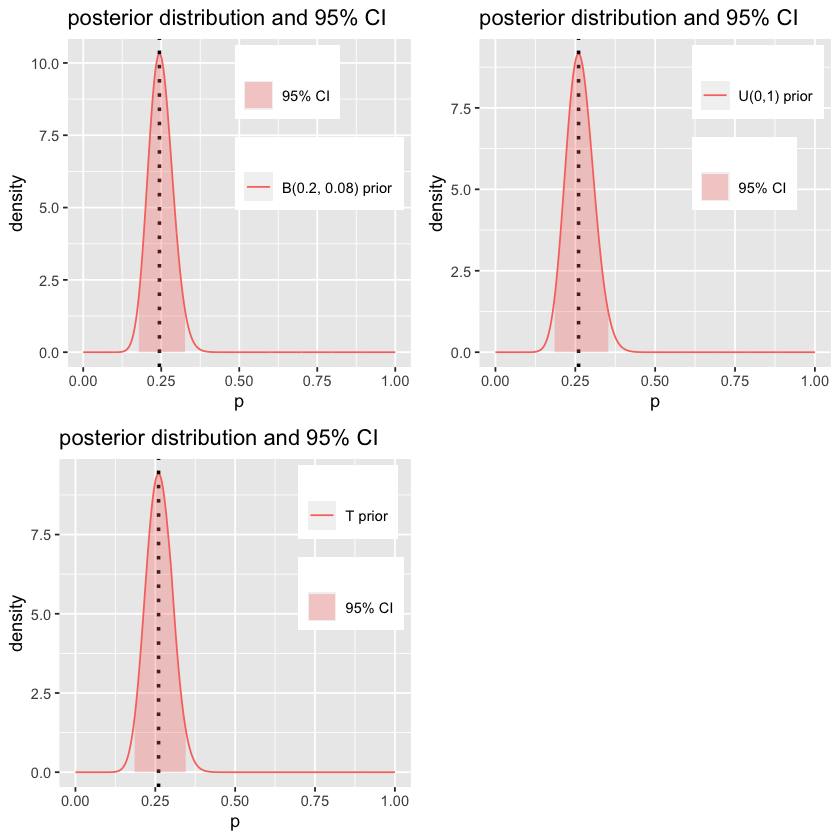

In [3]:
trapezoidal <- function(q) {
        c <- ifelse ((q>=0&q<0.1), 20*q, 
                 ifelse((q>=0.1&q<0.3), 2, 
                 ifelse((q>=0.3&q<0.5), 5-10*q, 0))) 
        return(c)
    }       

norm_trapezoidal <- function(x) {
    
    return(trapezoidal(x)/integrate(trapezoidal, lower=0, upper=1)$value)
    
}

numExtreme <- function(c, p, q) {
    x <- cumsum(c)/1000
    r <- 0
    for (i in 1:(length(x)-1)) {
        if (x[i]<q & x[i+1]>q) {
            r <- p[i+1]
        }
    }
    return(r)
    
    
} 


#a) drawing the 3 priors distribution
mu <- 0.2
sigma <- 0.08^2

alpha <- (mu*(mu*(1-mu)/sigma-1))
beta <- (1-mu)*(mu*(1-mu)/sigma-1)

p <- seq(0,1,len=1000)
delta.p <- 1/1000


plot1 <- ggplot()+
geom_line(aes(x=p, y=dbeta(p, shape1=alpha, shape2=beta), colour='B(0.2, 0.08)'))+
geom_line(aes(x=p, y=dunif(p), colour='U(0,1)'))+
geom_line(aes(x=p, y=norm_trapezoidal(p), colour='T')) +
labs(colour='Prior', y='density', title='Different prior distributions')+
ylim(0, 6) +
theme(
legend.position = c(0.9, 0.95),
legend.justification = c("right", "top"))



#b)
normalize <- function(v, delta) {
    return(v/(sum((unlist(v)), na.rm=T) *delta))
}


N=100
r=26

prior <-list(dbeta(p, shape1=alpha, shape2=beta), dunif(p), norm_trapezoidal(p))
likelihood <- dbinom(r, p=p, size=N)/integrate(dbinom, lower=0, upper=1, x=r, size=Ntrials)$value
posterior <- lapply(prior, '*', likelihood)
norm_posterior <- lapply(posterior,  normalize, delta=delta.p)
distribution<-c('B(0.2, 0.08) prior', 'U(0,1) prior', 'T prior')
lower <- lapply(norm_posterior, numExtreme,  p=p, q=0.025)
upper <- lapply(norm_posterior, numExtreme,  p=p, q=0.975)

plot2<-ggplot() +   
lapply(1:3, function(i)    
    geom_line(aes(x = p, y = unlist(as.vector(norm_posterior[[i]])), color=(distribution[i])), na.rm=TRUE  )) +
    labs(colour="",  x='p', y='density', title='posterior distributions for different priors') +
    theme(
    legend.position = c(0.98, 0.98),
    legend.justification = c("right", "top"))
    
grid.arrange(plot1, plot2)
   
#c)

plots <- lapply(1:3, function(i)  ggplot() +   
    geom_line(aes(x = p, y = unlist(norm_posterior[i]), color=(distribution[i])), na.rm=TRUE  ) +
    labs(colour="",  x='p', y='density', fill='', title='posterior distribution and 95% CI') +
    geom_vline(xintercept = p[[which.max(norm_posterior[[i]])]], linetype="dotted", size=1)+
    geom_area(aes( x = ifelse(p>unlist(lower[i]) & p< unlist(upper[i]), p, 0), y=unlist(norm_posterior[i]), fill='95% CI'), alpha=0.3)+
    ylim(0, max(unlist(norm_posterior[i])))+
    theme(
    legend.position = c(0.98, 0.98),
    legend.justification = c("right", "top"))          
               )
    
       
do.call(grid.arrange, c(plots, ncol=2))
       



### Exercise 3

In [4]:
results <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H',
'H', 'H')

r <- nHeads <- sum(results=='H')
nTails <- sum(results=='T')
nTrials <- length(results)

pHeads <- nHeads / nTrials

In [5]:
#function to retreieve upper extreme given the integral value
extreme <- function(f, q, lower=0, upper=1, ...) {
    
        integral <- function(x){
                                         return(integrate(f=f, 
                                         lower, 
                                         upper=x, ...
                                        )$value)
                              
                    }
    
        F.inv <- function(y){
                                     uniroot(function(x){integral(x)-y}, 
                                     interval=c(lower, upper), 
                                     extendInt='yes', 
                                     tol=0.0001)$root
                        }
    return (F.inv(q))


} 



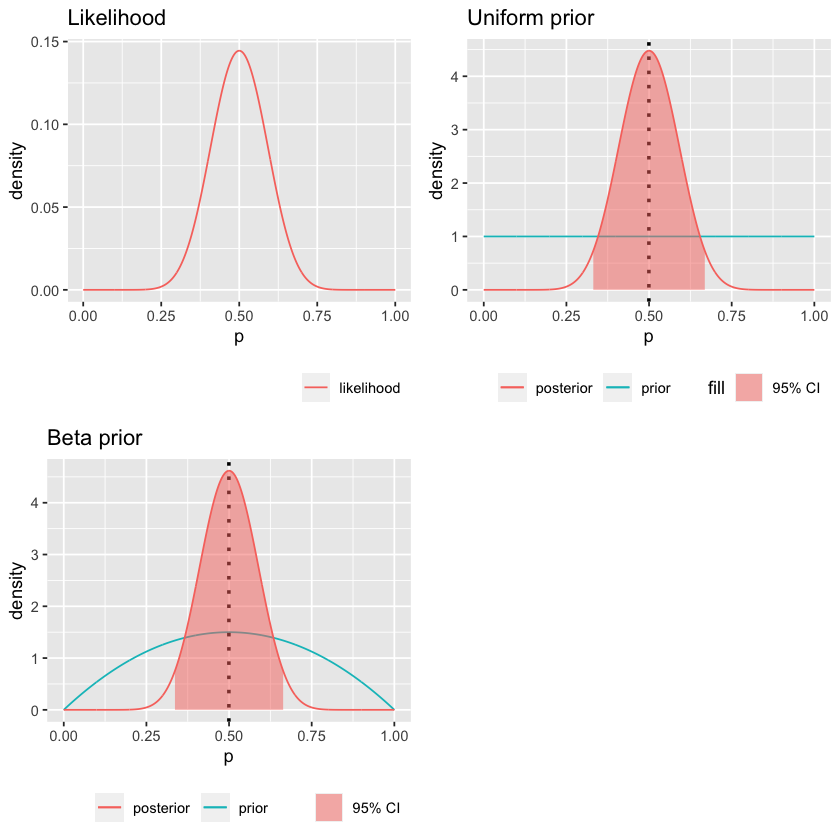

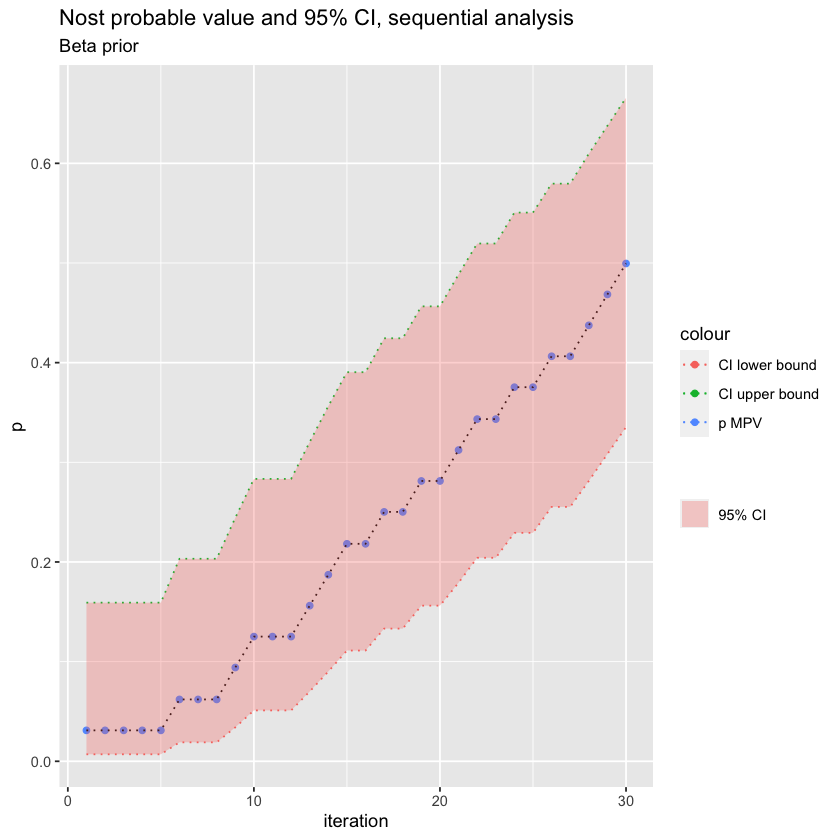

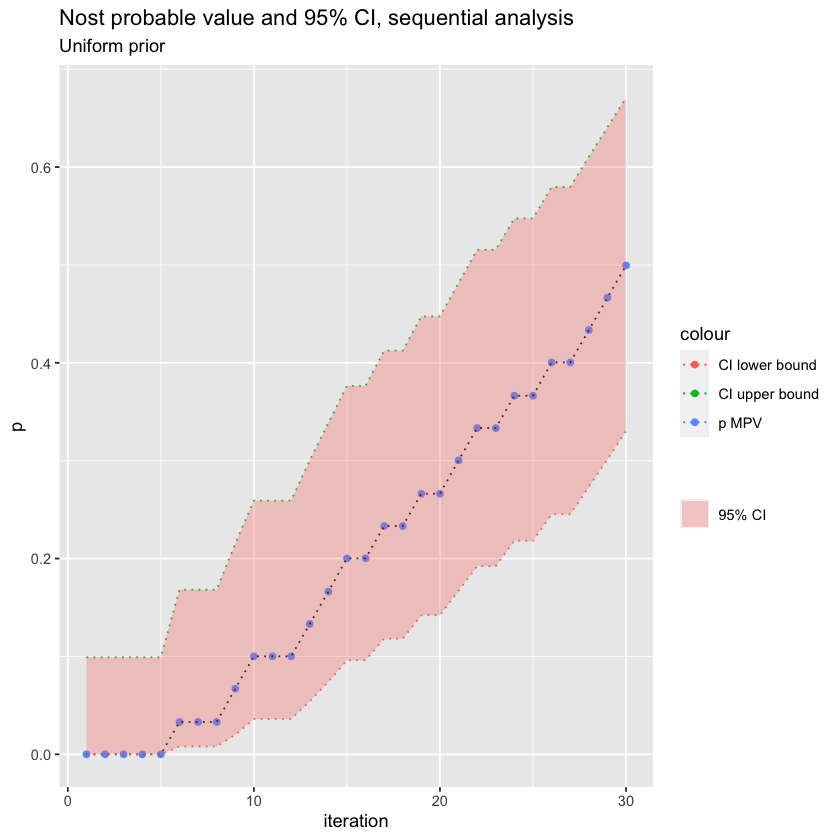

In [6]:
#uniform prior
p <- seq(0,1,len=1000)
likelihood <- dbinom(x=r, p=p, size=nTrials)



prior_u <- dunif(p)
norm_u <- integrate(dbinom, lower=0, upper=1, x=r, size=nTrials)$value
posteriorF_u <- function(p){return(dbinom(r, nTrials, p)/norm_u)}
posterior_u <- posteriorF_u(p)
p_unif = p[which.max(unlist(posterior_u))]
upperu = extreme(f=posteriorF_u, q=0.975)
loweru=extreme(f=posteriorF_u, q=0.025)

plot1<-ggplot()+geom_line(aes(x=p, y=likelihood, color='likelihood'))+
labs(color='', y='density', title='Likelihood')+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))


plot2<-ggplot()+geom_line(aes(x=p, y=prior_u, color='prior'))+
geom_line(aes(x=p, y=posterior_u, color='posterior'))+
geom_vline(xintercept = p_unif, linetype="dotted", size=1)+
geom_area(aes(y=posterior_u, x = ifelse(p>loweru & p< upperu , p, 0), fill='95% CI'), alpha=0.5)+
ylim(0, max(unlist(posterior_u)))+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
labs(colour='', y='density', title='Uniform prior')




alpha=2
beta=2
prior_b <-dbeta(x=p, shape1=alpha, shape2=beta)
norm_b<-integrate(dbeta, lower=0, upper=1, shape1=r+alpha, shape2=nTrials-r+beta)$value
posteriorF_b<-function(p){return(dbeta(x=p, shape1=r+alpha, shape2=nTrials-r+beta )/norm_b)}
posterior_b <- posteriorF_b(p)
upperb = extreme(f=posteriorF_b, q=0.975)
lowerb=extreme(f=posteriorF_b, q=0.025)


p_binom = p[which.max(unlist(posterior_b))]
plot3<-ggplot()+geom_line(aes(x=p, y=prior_b, color='prior'))+
geom_line(aes(x=p, y=posterior_b, color='posterior'))+
geom_vline(xintercept = p_binom, linetype="dotted", size=1)+
geom_area(aes(y=posterior_b, x = ifelse(p>lowerb & p< upperb , p, 0), fill='95% CI'), alpha=0.5)+
ylim(0, max(unlist(posterior_b)))+
    theme(
    legend.position="bottom",
    legend.justification = c("right", "top"))+
labs(colour='', y='density', title='Beta prior', fill='')



grid.arrange(plot1, plot2, plot3, ncol=2)

#most probable value and credibility interval
posteriorF_b<-function(r,p){return(dbeta(x=p, shape1=r+alpha, shape2=nTrials-r+beta )/
                                   integrate(dbeta, lower=0, upper=1, shape1=r+alpha, shape2=nTrials-r+beta)$value

)}


posteriorF_u <- function(r, p){return(dbinom(r, nTrials, p)/
                                   integrate(dbinom, lower=0, upper=1, x=r, size=nTrials)$value)}


heads <- rep(0, nTrials)
heads[results=='H']=1
cumHeads <-cumsum(heads)



title<- list('Beta prior', 'Uniform prior')
posteriorVec <- list(posteriorF_b, posteriorF_u)

for (i in 1:2) {
    posterior<-lapply(cumHeads, posteriorVec[[i]], p)
    post_mat <- matrix(unlist(posterior), nrow = length(posterior), byrow = TRUE)
    theta <- p[max.col(post_mat)]
    lower=apply(post_mat,1, numExtreme, p=p,  q=0.025)
    upper=apply(post_mat,1, numExtreme, p=p,  q=0.975)
    time <- c(1:30)
    plot1<- ggplot() + 
    geom_point(aes(x=time, y=theta, colour='p MPV'))+
    geom_line(aes(x=time, y=theta), linetype='dotted')+
    geom_line(aes(x=time, y=upper, color='CI upper bound'), linetype='dotted')+
    geom_line(aes(x=time, y=lower, color='CI lower bound'), linetype='dotted')+
    geom_ribbon(aes(x=time,ymin = lower, ymax = upper, fill = "95% CI"), alpha=0.3)+
    labs(x='iteration', y='p', title='Nost probable value and 95% CI, sequential analysis', subtitle=title[i], fill='')
    print(plot1)


    
}





The results obtained in the last iteration of the iterative analysis coincide with the ones obtained in the one-step analysis. In the previous iteration we obtain a 'partial' result depending on the number of heads retrieved until that moment: as the number of data grows we retrieve a fair-coin most probable value and the equivalence between the processes with different priors.